This notebook showcases a few simple utility functions to extractpoints of curves from svg paths to generate Gempy imput. It is not thoroughly tested and is no offical addon of Gempy. It was tested for SVG files created in inkscape and containing ONLY the lines to be digitized. The vertical line in inksape pointing downwards should be treated as "depth" (increases towards bottom). Output will be masl (meters above sea level)

In [1]:
from svg_digitizer import *

In [2]:
filename = "./data/profiles/sketch_01.svg"

In [3]:
# code to process SVG and extract lines with a specified segment length
lines_from_svg = svg_input(filename, segment_length=2)

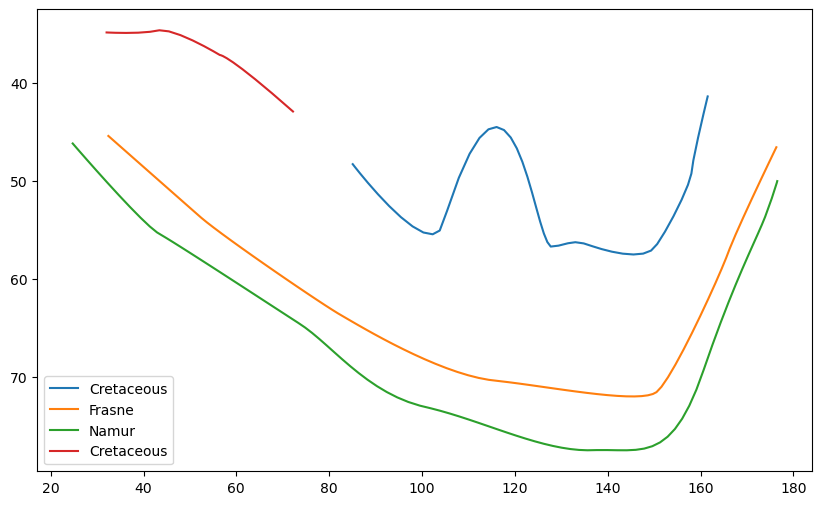

In [4]:
# show points of extracted lines
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for line in lines_from_svg.results:
    pnts = line.points
    plt.plot(pnts[:, 0], pnts[:, 1], label=line.inkscape_label)
plt.ylim(plt.ylim()[::-1])  # Reverse y-axis
plt.legend()

To obtain spatial coords, we are turning the former y axis from the SVG into the spatial z coordindate. The spatial x and y is obtained by interpolating along the ```shapely.geometry.LineString``` in the function ```extract_spatial_coords_from_svg```. ```zlim``` has to be picked so that it covers the complete range depicted in the digitized cross section.

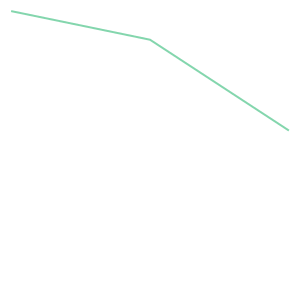

In [5]:
profile_line = LineString([(500000, 0), (550000, -10300), (600000, -43000)])
profile_line

In [6]:
extract_spatial_coords_from_svg(lines_from_svg, profile_line, zlim=(-300, 100))

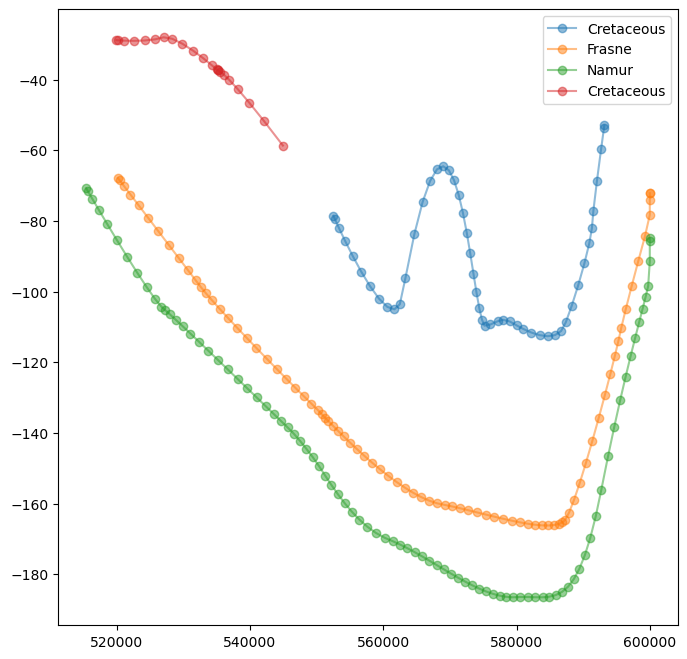

In [7]:
plt.figure(figsize=(8, 8))

for r in lines_from_svg.results:
    
    pts = r.coords
    x, y, z = zip(*pts)
    plt.plot(x, z, marker='o', alpha=0.5, label=r.inkscape_label or r.path_id)
#plt.axis('equal')
plt.legend()
#plt.ylim(plt.ylim()[::-1])  # Invert y-axis for SVG coordinate system
#plt.savefig("extracted_paths.svg", dpi=300)
plt.show()

Interpolated coords are stored in ```results.coords``` and could be stored to a gempy ready dataframe in a way like this: 

In [8]:
import pandas as pd

line_dfs = []

for line in lines_from_svg.results:
    df = pd.DataFrame(line.coords, columns=["X", "Y", "Z"])
    df["formation"] = line.inkscape_label
    
    line_dfs.append(df)
line_data = pd.concat(line_dfs, ignore_index=True)
line_data.to_csv("./data/profiles/digitized_profile_01.csv", index=False)
line_data # ready to be used in gempy

,X,Y,Z,formation
0,552515.200623,-11944.941207,-78.551415,Cretaceous
1,552735.653238,-12089.117218,-79.487916,Cretaceous
2,553343.320651,-12486.531706,-81.992490,Cretaceous
3,554257.667212,-13084.514357,-85.607748,Cretaceous
4,555398.157270,-13830.394855,-89.876297,Cretaceous
...,...,...,...,...
234,524183.685583,-4981.839230,-28.933123,Cretaceous
235,522548.381990,-4644.966690,-29.021752,Cretaceous
236,521127.639283,-4352.293692,-28.968235,Cretaceous
237,520183.175198,-4157.734091,-28.876200,Cretaceous
